In [1]:
library('tidyverse')
library('ggrepel')

Warning message:
“Failed to locate timezone database”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
states <- read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-08-01/states.csv')

Rows: 50 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (5): state, postal_abbreviation, capital_city, largest_city, demonym
dbl  (8): population_2020, total_area_mi2, total_area_km2, land_area_mi2, la...
date (1): admission

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
states |> head()

state,postal_abbreviation,capital_city,largest_city,admission,population_2020,total_area_mi2,total_area_km2,land_area_mi2,land_area_km2,water_area_mi2,water_area_km2,n_representatives,demonym
<chr>,<chr>,<chr>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Alabama,AL,Montgomery,Huntsville,1819-12-14,5024279,52420,135767,50645,131171,1775,4597,7,Alabamian
Alaska,AK,Juneau,Anchorage,1959-01-03,733391,665384,1723337,570641,1477953,94743,245384,1,Alaskan
Arizona,AZ,Phoenix,Phoenix,1912-02-14,7151502,113990,295234,113594,294207,396,1026,9,Arizonan
Arkansas,AR,Little Rock,Little Rock,1836-06-15,3011524,53179,137732,52035,134771,1143,2961,4,Arkansan
California,CA,Sacramento,Los Angeles,1850-09-09,39538223,163695,423967,155779,403466,7916,20501,52,Californian
Colorado,CO,Denver,Denver,1876-08-01,5773714,104094,269601,103642,268431,452,1170,8,Coloradan


In [4]:
top10 <- states |>
arrange(desc(population_2020)) |>
head(10)

print(top10)

# A tibble: 10 × 14
   state          postal_abbreviation capital_city largest_city  admission 
   <chr>          <chr>               <chr>        <chr>         <date>    
 1 California     CA                  Sacramento   Los Angeles   1850-09-09
 2 Texas          TX                  Austin       Houston       1845-12-29
 3 Florida        FL                  Tallahassee  Jacksonville  1845-03-03
 4 New York       NY                  Albany       New York City 1788-07-26
 5 Pennsylvania   PA                  Harrisburg   Philadelphia  1787-12-12
 6 Illinois       IL                  Springfield  Chicago       1818-12-03
 7 Ohio           OH                  Columbus     Columbus      1803-03-01
 8 Georgia        GA                  Atlanta      Atlanta       1788-01-02
 9 North Carolina NC                  Raleigh      Charlotte     1789-11-21
10 Michigan       MI                  Lansing      Detroit       1837-01-26
# ℹ 9 more variables: population_2020 <dbl>, total_area_mi2 <dbl>,
#

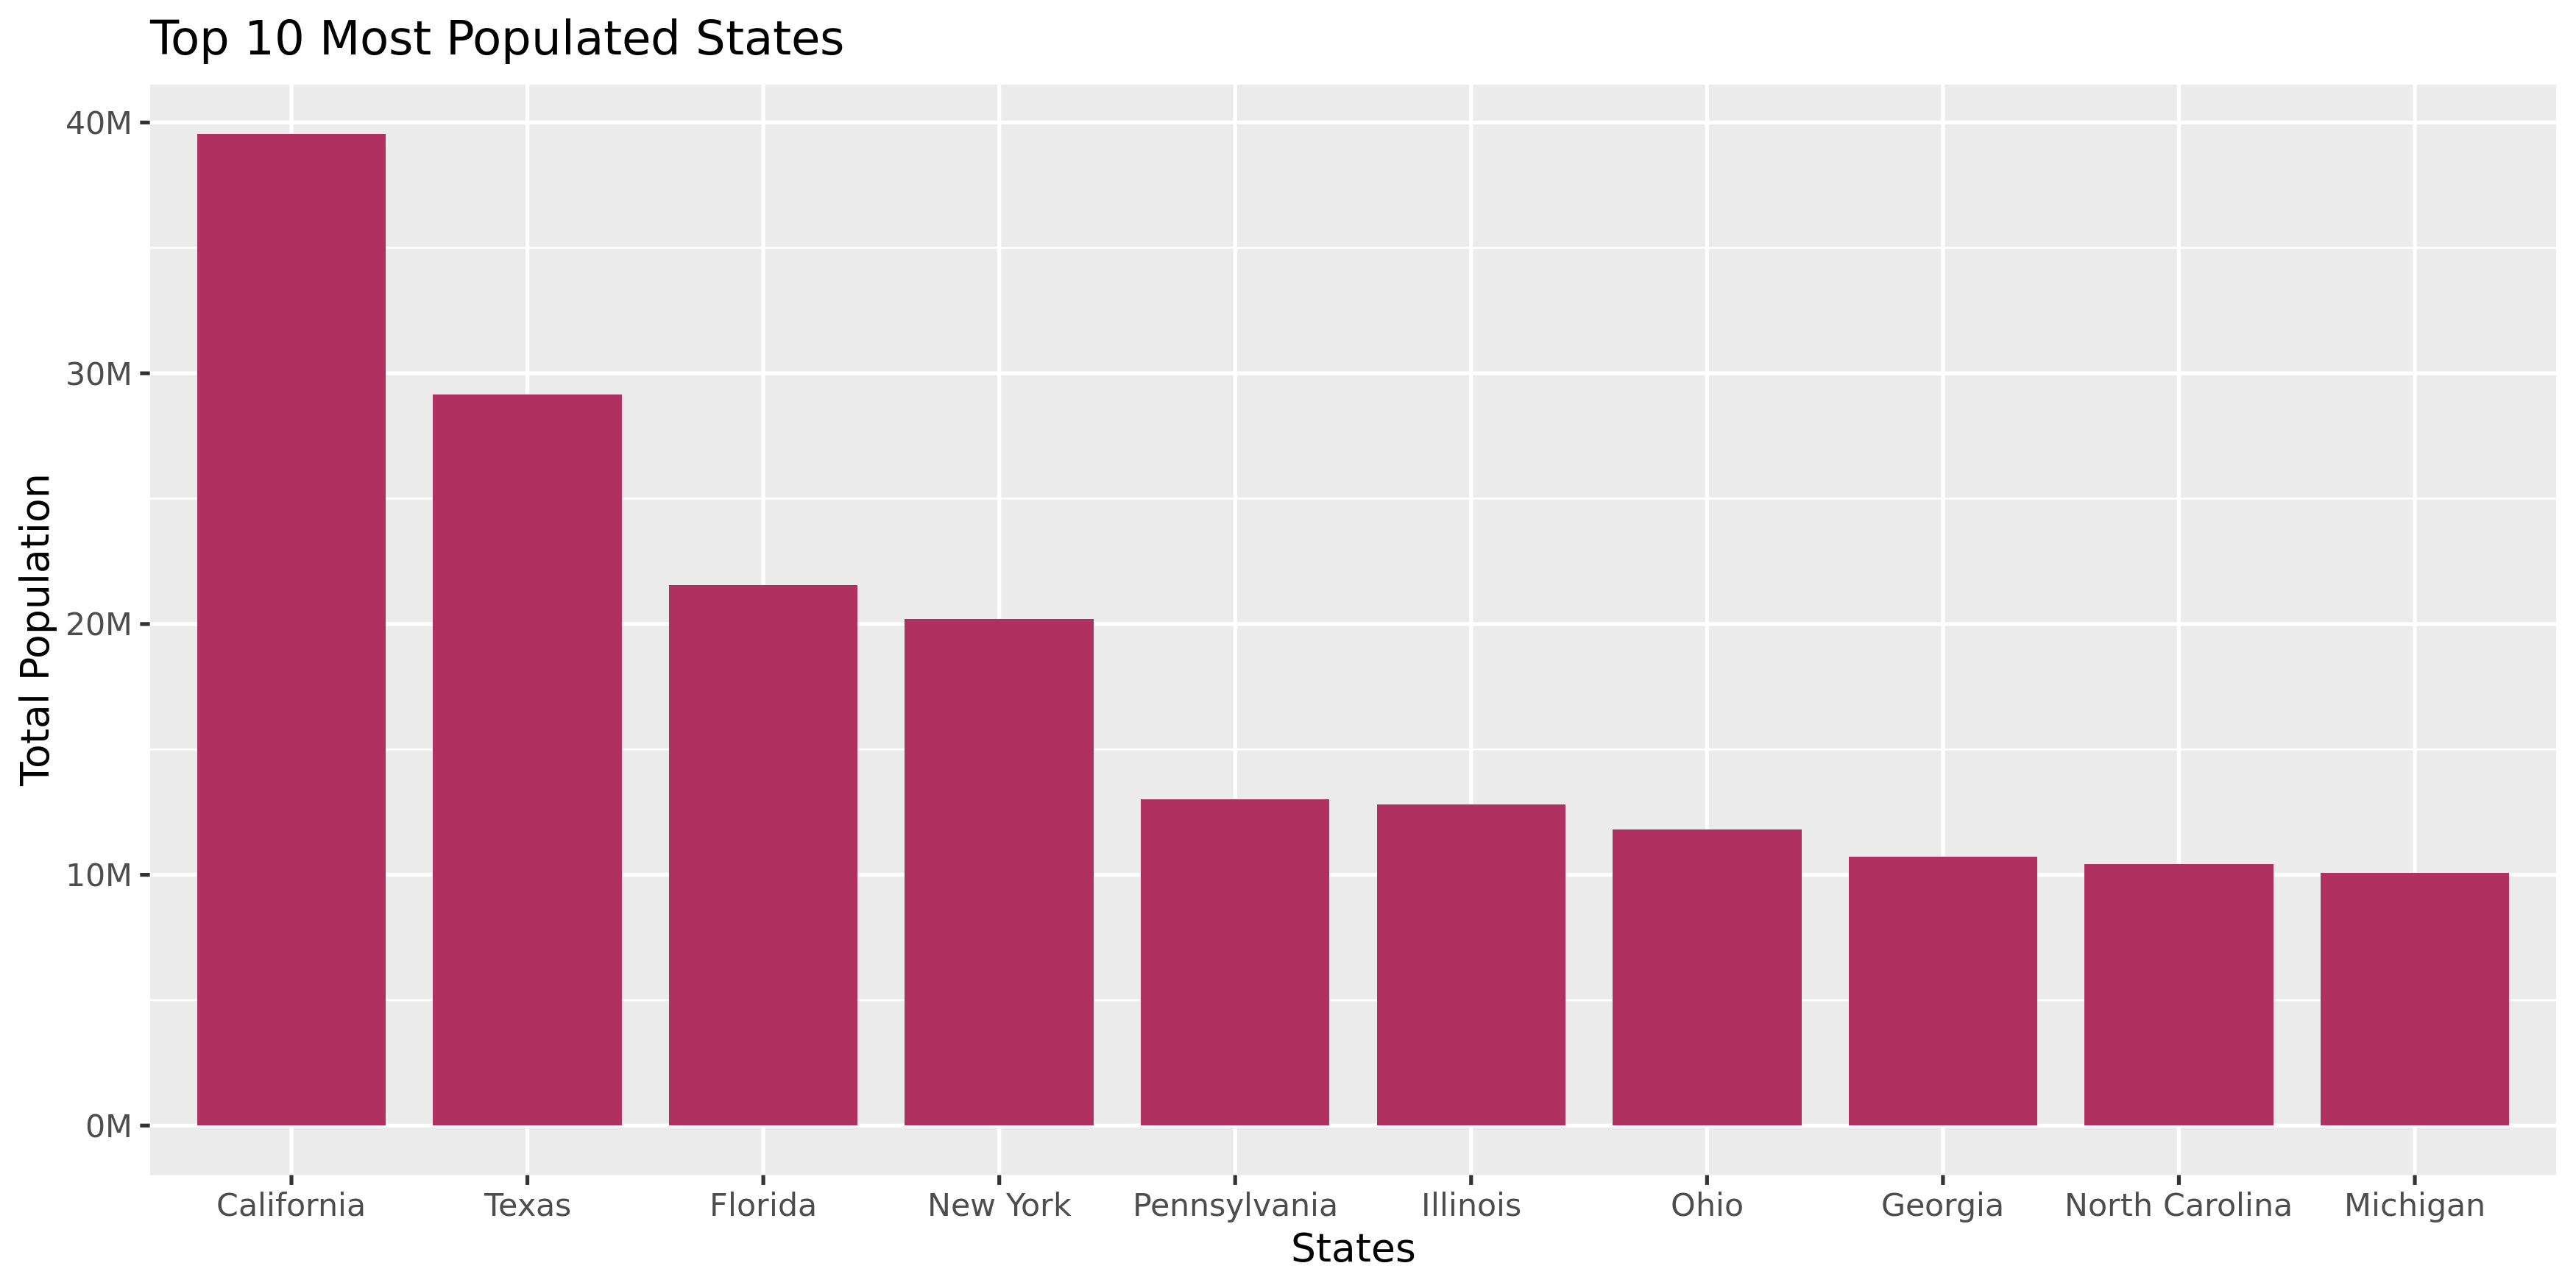

In [5]:
options(repr.plot.width = 10, repr.plot.height = 5, repr.plot.res = 350)

p = ggplot(top10, aes(x = reorder(state, -population_2020), y = population_2020))

p = p + geom_bar(stat = "identity", fill = "maroon", width = 0.8)

p = p + labs(title = "Top 10 Most Populated States", y = "Total Population", x = "States")

p = p + scale_y_continuous(labels = scales::comma_format(scale = 1e-6, suffix = "M"))

p

In [6]:
states <- states %>%
  mutate(states2 = ifelse(capital_city == largest_city, "Same", "Different"))

states2 <- states |>
filter(states2 == "Same")

states2 |> head()

state,postal_abbreviation,capital_city,largest_city,admission,population_2020,total_area_mi2,total_area_km2,land_area_mi2,land_area_km2,water_area_mi2,water_area_km2,n_representatives,demonym,states2
<chr>,<chr>,<chr>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Arizona,AZ,Phoenix,Phoenix,1912-02-14,7151502,113990,295234,113594,294207,396,1026,9,Arizonan,Same
Arkansas,AR,Little Rock,Little Rock,1836-06-15,3011524,53179,137732,52035,134771,1143,2961,4,Arkansan,Same
Colorado,CO,Denver,Denver,1876-08-01,5773714,104094,269601,103642,268431,452,1170,8,Coloradan,Same
Georgia,GA,Atlanta,Atlanta,1788-01-02,10711908,59425,153910,57513,148959,1912,4951,14,Georgian,Same
Hawaii,HI,Honolulu,Honolulu,1959-08-21,1455271,10932,28313,6423,16635,4509,11678,2,Hawaii resident,Same
Idaho,ID,Boise,Boise,1890-07-03,1839106,83569,216443,82643,214045,926,2398,2,Idahoan,Same


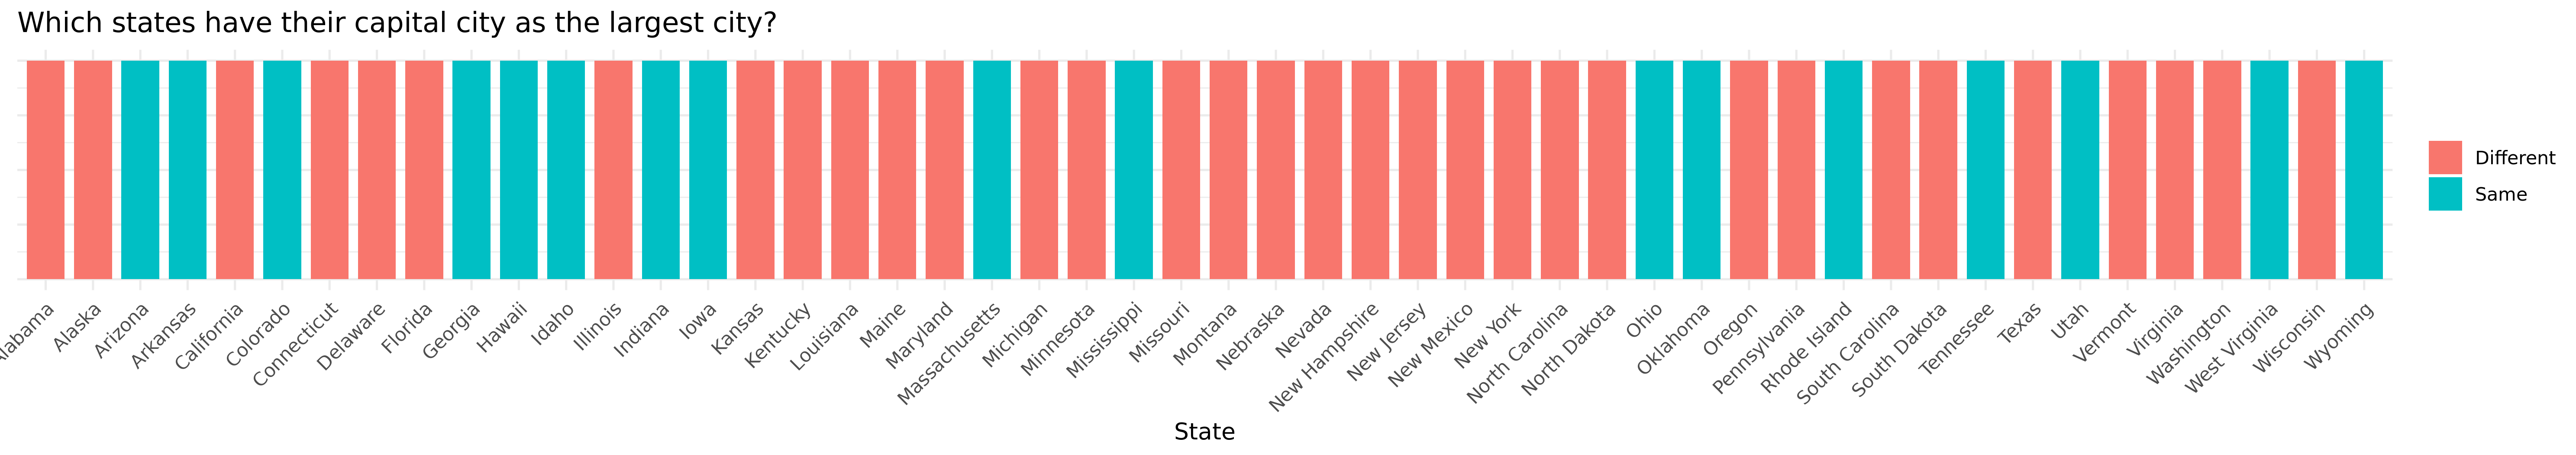

In [22]:
options(repr.plot.width = 17, repr.plot.height = 3, repr.plot.res = 350)

p = ggplot(states, aes(x = state, fill = states2)) +
  geom_bar(stat = "count", position = "dodge", width = 0.8) +
  labs(title = "Which states have their capital city as the largest city?",
       x = "State",y = NULL, fill = NULL) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1), axis.text.y = element_blank())

p

In [8]:
representatives <- states |>
  arrange(n_representatives) |>
head(10)
representatives |> head()

state,postal_abbreviation,capital_city,largest_city,admission,population_2020,total_area_mi2,total_area_km2,land_area_mi2,land_area_km2,water_area_mi2,water_area_km2,n_representatives,demonym,states2
<chr>,<chr>,<chr>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Alaska,AK,Juneau,Anchorage,1959-01-03,733391,665384,1723337,570641,1477953,94743,245384,1,Alaskan,Different
Delaware,DE,Dover,Wilmington,1787-12-07,989948,2489,6446,1949,5047,540,1399,1,Delawarean,Different
North Dakota,ND,Bismarck,Fargo,1889-11-02,779094,70698,183108,69001,178711,1698,4397,1,North Dakotan,Different
South Dakota,SD,Pierre,Sioux Falls,1889-11-02,886667,77116,199729,75811,196350,1305,3379,1,South Dakotan,Different
Vermont,VT,Montpelier,Burlington,1791-03-04,643077,9616,24906,9217,23871,400,1035,1,Vermonter,Different
Wyoming,WY,Cheyenne,Cheyenne,1890-07-10,576851,97813,253335,97093,251470,720,1864,1,Wyomingite,Same


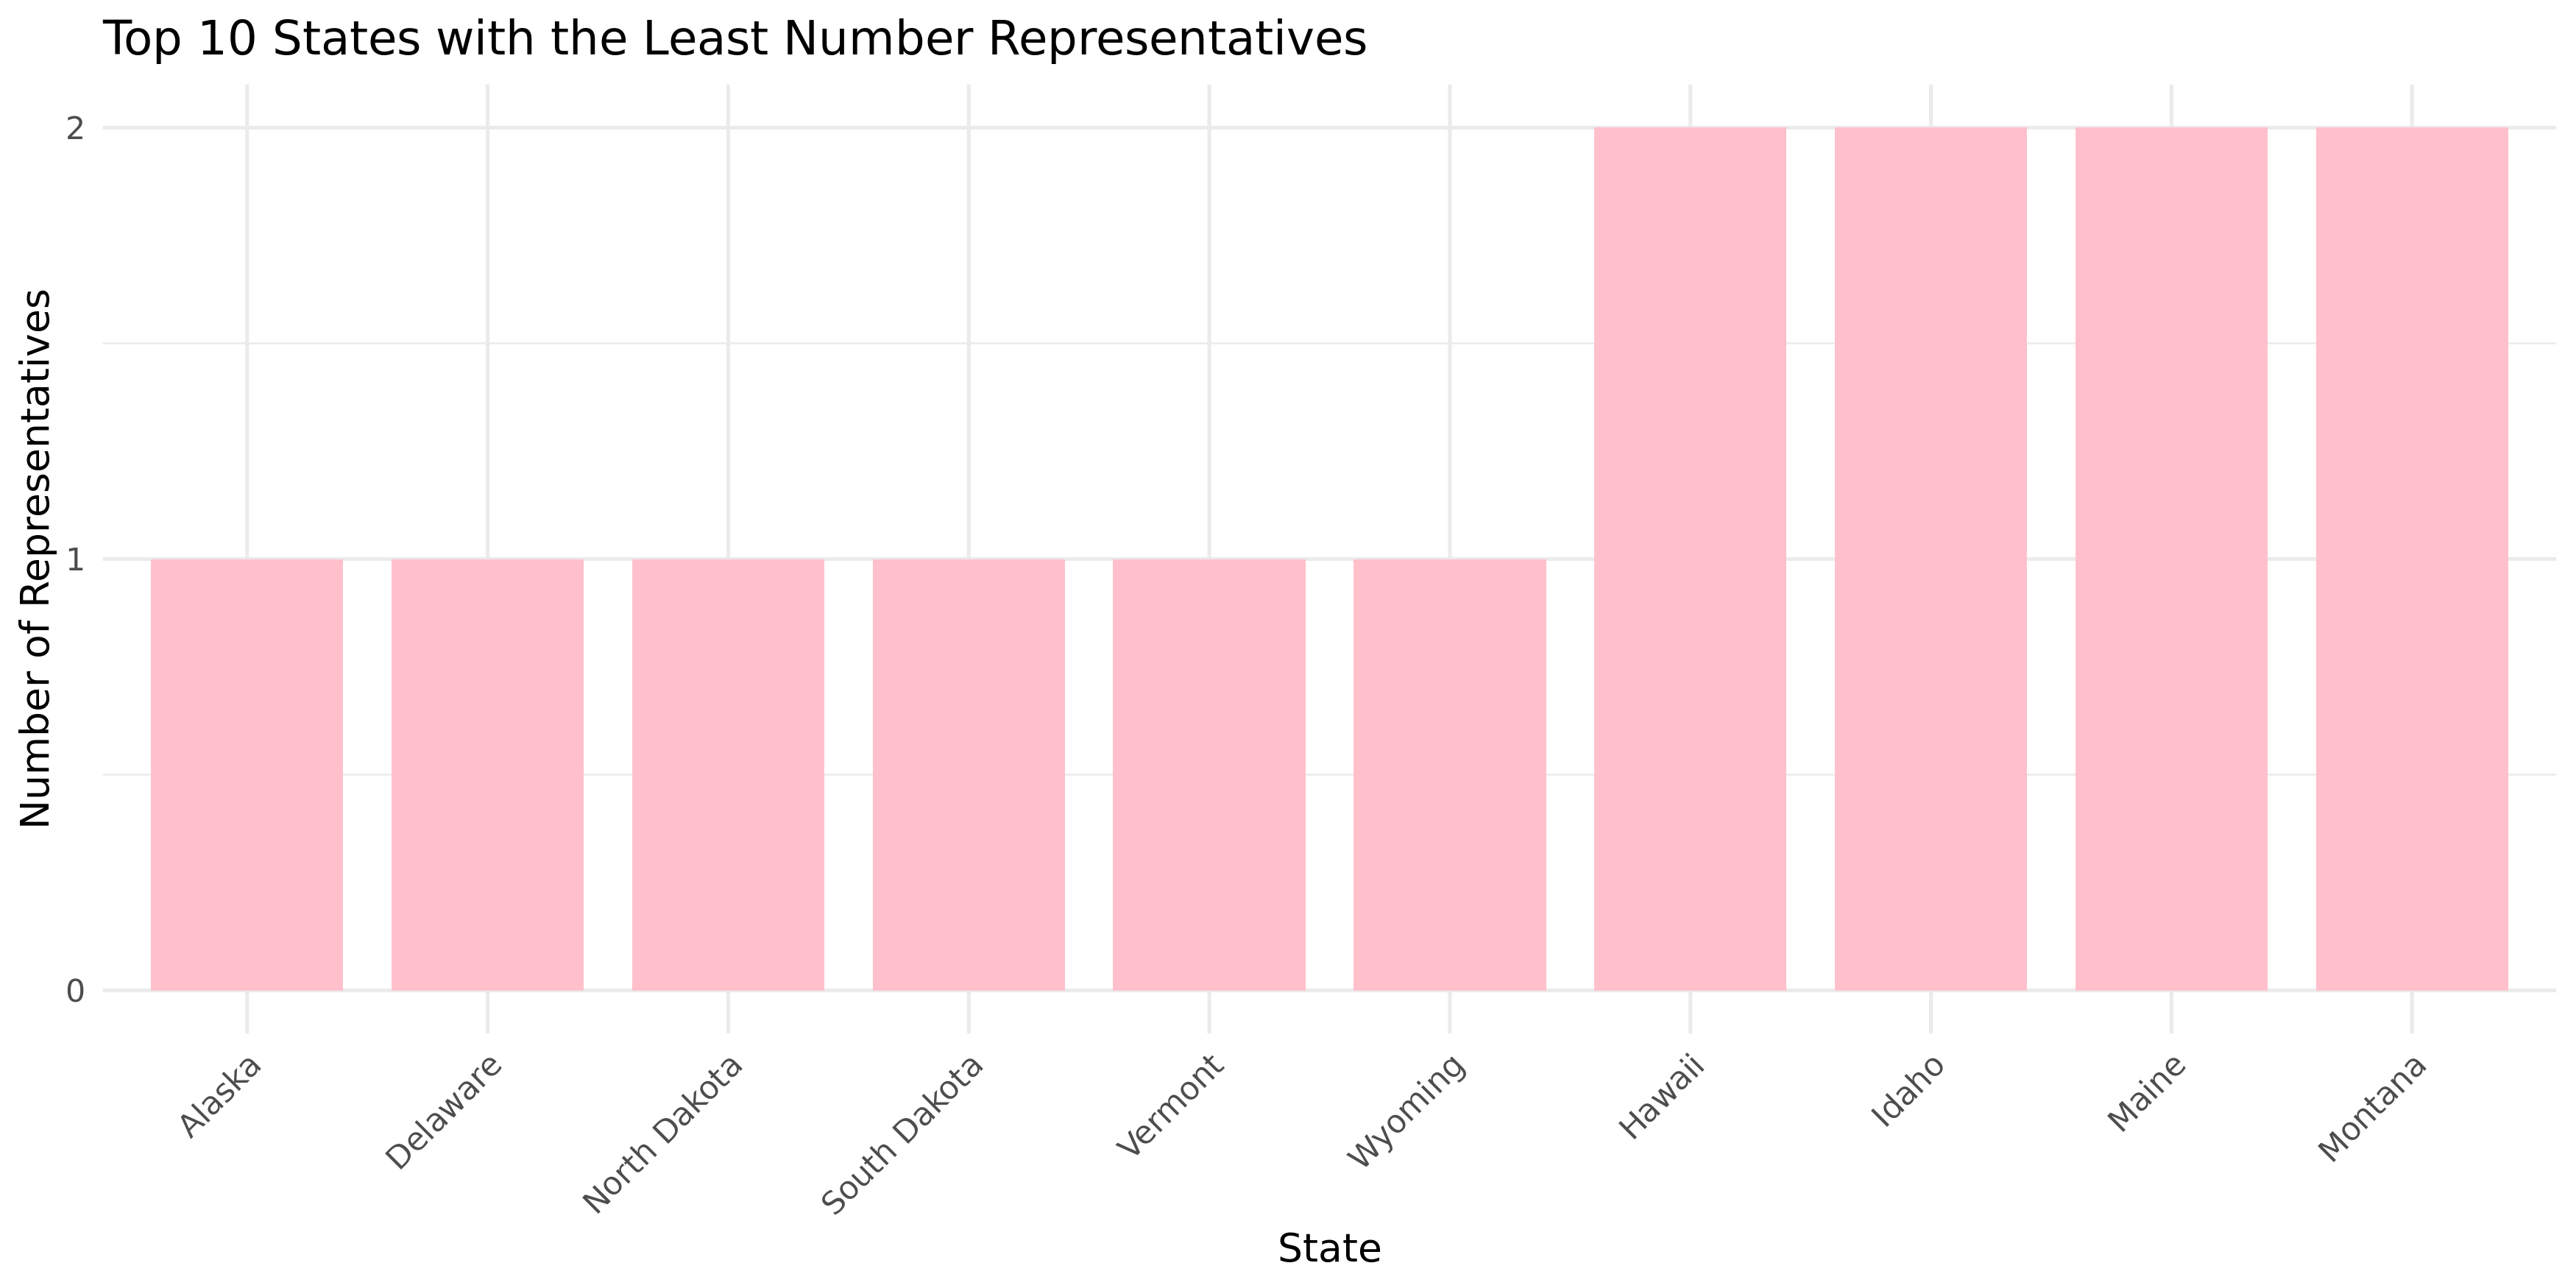

In [28]:
options(repr.plot.width = 10, repr.plot.height = 5, repr.plot.res = 350)

p = ggplot(representatives, aes(x = reorder(state, n_representatives), y = n_representatives))
  
p = p + geom_bar(stat = "identity", fill = "pink", width = 0.8) +
  labs(title = "Top 10 States with the Least Number Representatives",
       x = "State",
       y = "Number of Representatives")

p = p + theme_minimal() + theme(axis.text.x = element_text(angle = 45, hjust = 1))

p = p + scale_y_continuous(breaks = seq(0, max(states$n_representatives), by = 1))

p

In [10]:
admissions <- states |>
  group_by(admission) |>
  summarize(number_of_states = n())

admissions2 <- admissions |>
filter(number_of_states == max(number_of_states))

admissions2 |> head()

admission,number_of_states
<date>,<int>
1889-11-02,2


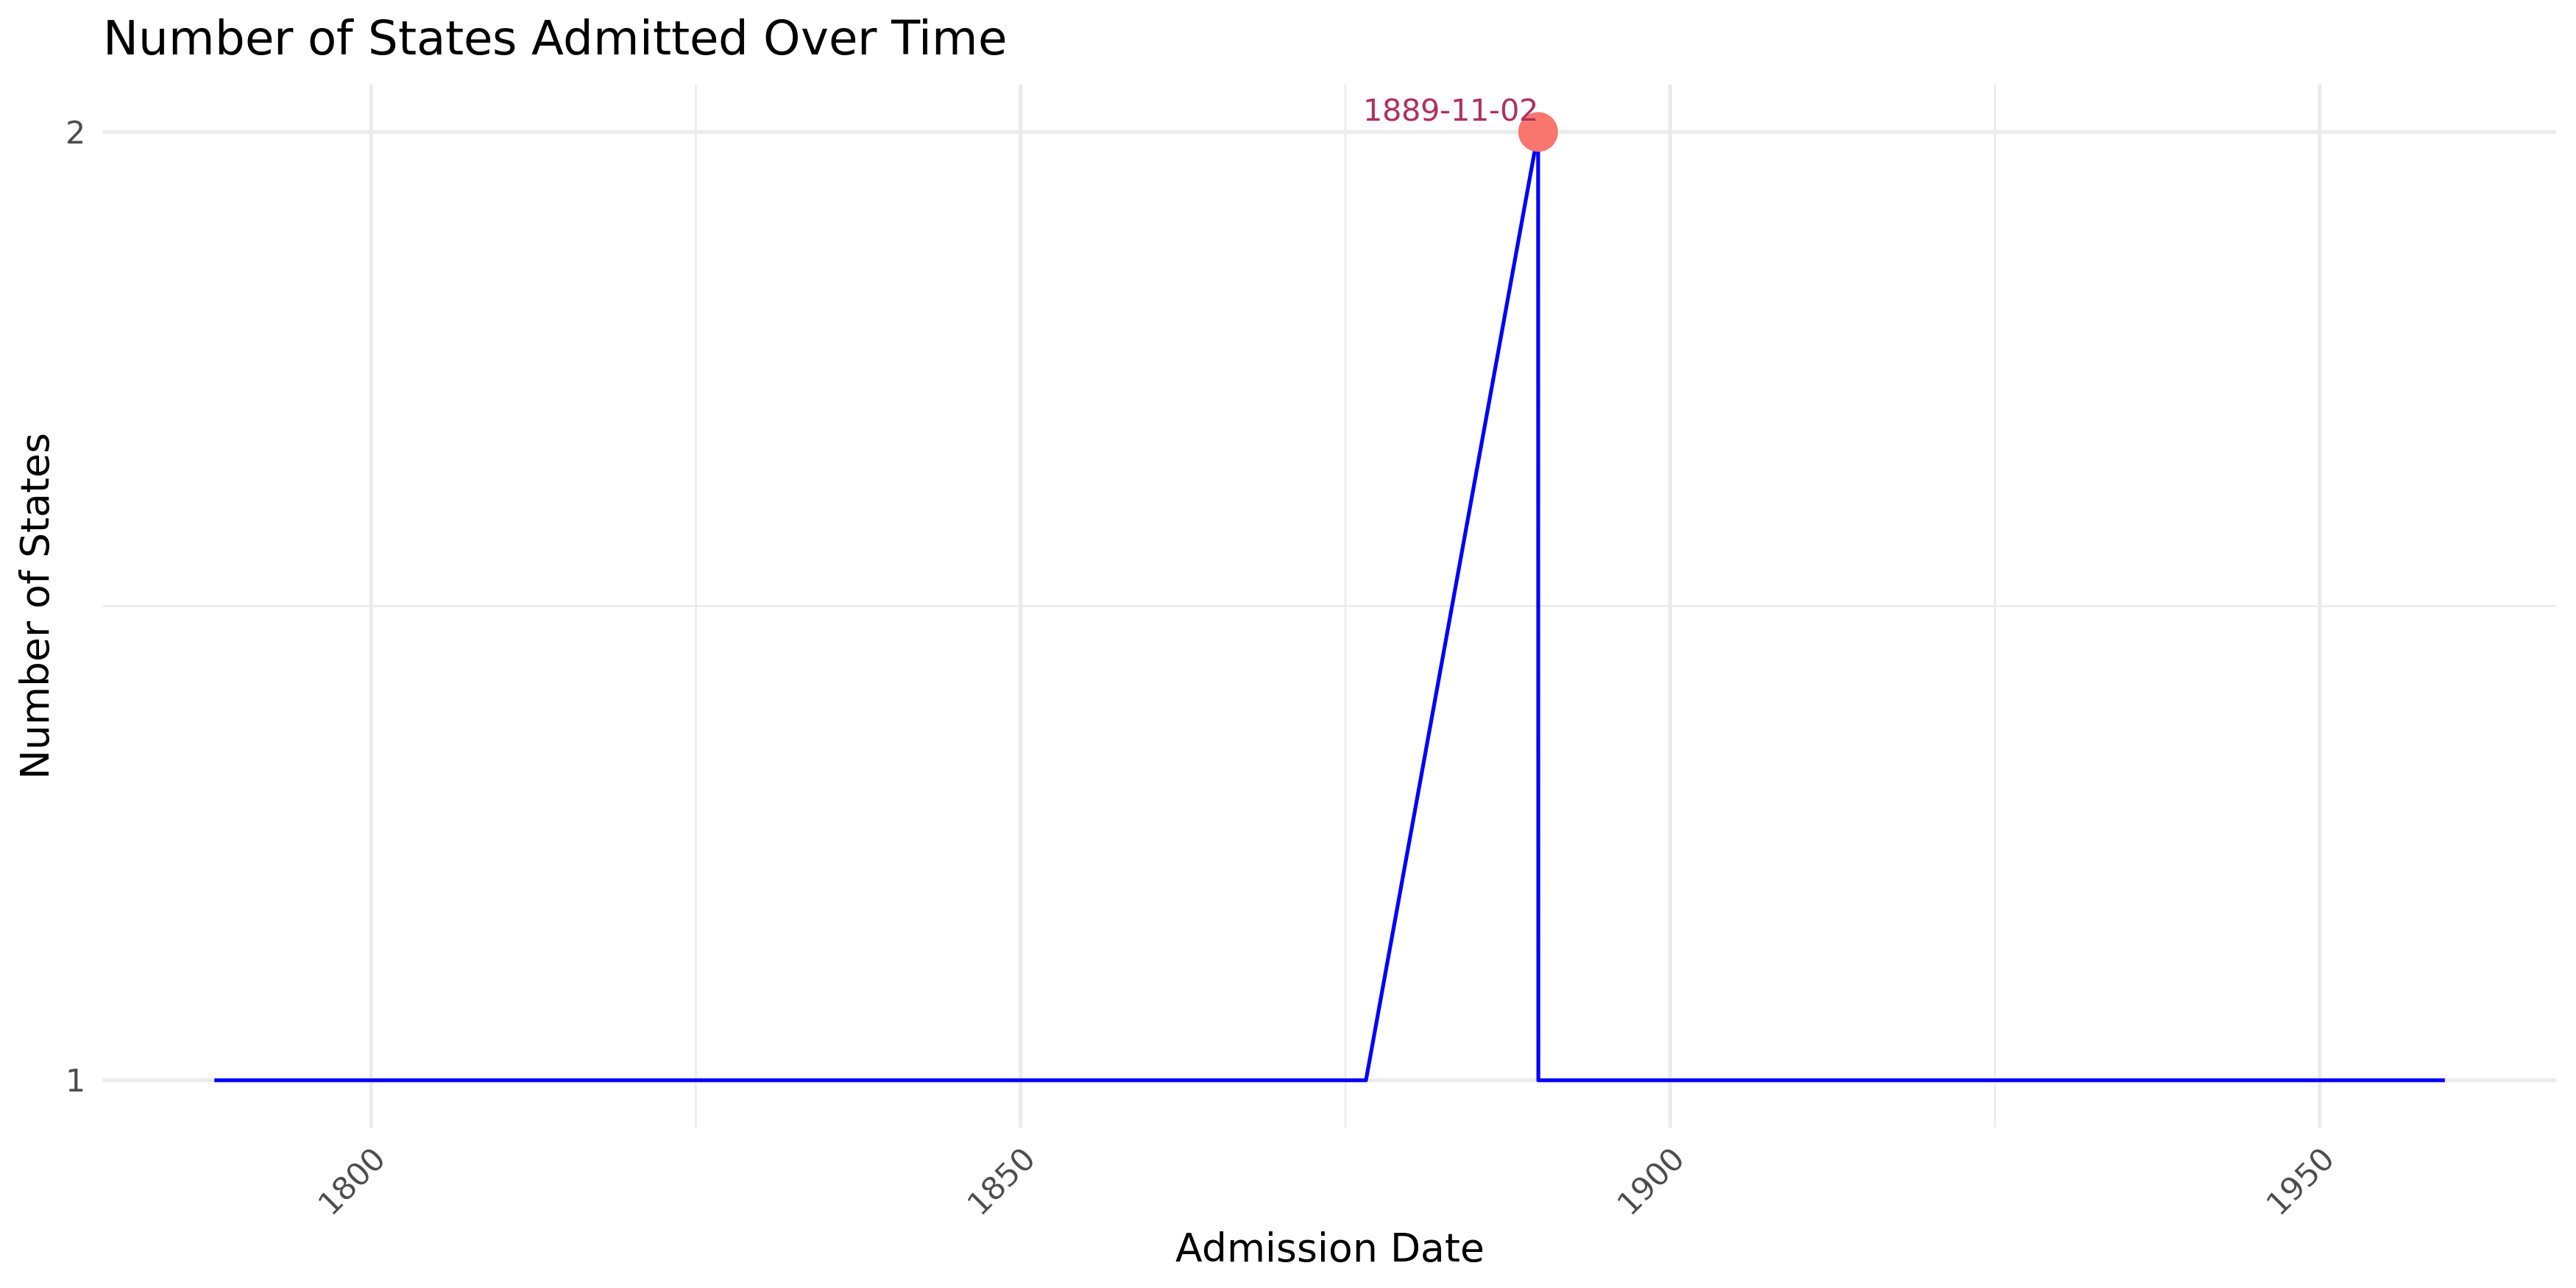

In [30]:
p = ggplot(admissions, aes(x = admission, y = number_of_states))

p = p +  geom_line(color = "blue") + labs(title = "Number of States Admitted Over Time", x = "Admission Date", y = "Number of States")

p = p + geom_point(data = admissions2, aes(x = admission, y = number_of_states, color = "maroon", size = 1))

p = p + geom_text(data = admissions2, aes(x = admission, y = number_of_states, label = admission), vjust = -0.5, hjust = 1, color = "maroon", size = 3)

p = p + theme_minimal() + theme(axis.text.x = element_text(angle = 45, hjust = 1), legend.position = "none")

p = p + scale_y_continuous(breaks = seq(0, max(admissions$number_of_states), by = 1))

p

For my final project, I used the US State Names data from TidyTuesday. First, I wanted to see which were the top 10 most populated states, so I created a table that showed the top 10 states in descending order. I made a bar chart using geom_bar to display the data and changed the y-axis values to make it easier for the reader to understand. Next, I wanted to see whether there were any states that had their capital city also as their largest city. I used the "mutate" function and another function called "ifelse" that we did not learn in class, but I was able to figure out how to use it to get the data I wanted. I initially wasn't sure how I wanted to display this data but eventually settled on another bar chart. This chart highlights which states have their capital city as their largest city (in blue) and which do not (in red). I also deleted the y-axis value labels because the legend on the right sufficiently explains how to read the chart.

For my third chart, I wanted to display data that showed which states had the least number of representatives. I used the "arrange" function this time in ascending order and displayed the data using a bar graph. Lastly, I wanted to see if there were any states that shared the same admission date. I created new variables called "admissions" and "admissions2" to group and filter the data and found that there were two states that shared the same admission date (ND and SD). I then plotted the data on a line graph and added a point with a label to indicate which admission date had two states admitted instead of one.